In [1]:
# Let's load and inspect the dataset to understand its structure and initial statistics.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# Suppress all warnings
warnings.filterwarnings('ignore')

In [3]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | 

In [4]:
# Load the dataset
file_path = 'train-data.csv'
df = pd.read_csv(file_path)

In [5]:
# Display basic information 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB
None


In [6]:
df.head() 

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
# Display basic descriptive statistics
print(df.describe())

        Unnamed: 0         Year  Kilometers_Driven        Seats        Price
count  6019.000000  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   3009.000000  2013.358199       5.873838e+04     5.278735     9.479468
std    1737.679967     3.269742       9.126884e+04     0.808840    11.187917
min       0.000000  1998.000000       1.710000e+02     0.000000     0.440000
25%    1504.500000  2011.000000       3.400000e+04     5.000000     3.500000
50%    3009.000000  2014.000000       5.300000e+04     5.000000     5.640000
75%    4513.500000  2016.000000       7.300000e+04     5.000000     9.950000
max    6018.000000  2019.000000       6.500000e+06    10.000000   160.000000


### Descriptive Statistics Insights
Based on the descriptive statistics provided, we can draw several inferences about the dataset:
#### Year:
- Range: 1998 to 2019.
- Mean: 2013.36, suggesting that the majority of the cars in the dataset are relatively recent.
- Distribution Insight: Given the mean and the minimum year, a majority of the data likely centers around the last decade.

#### Kilometers_Driven:
- Range: 171 to 6,500,000.
- Mean: 58,738.38.
- Variance: High standard deviation (91,268.84) indicates significant variability in the mileage of the cars.
Insight: Some cars have extraordinarily high mileage, which might be outliers.

####  Seats:
- Range: 0 to 10.
- Mean: 5.28, which is typical for most passenger vehicles.
- Insight: The minimum of 0 suggests missing or erroneous data that needs correction.

#### Price:
- Range: 0.44 to 160.
- Mean: 9.48.
- Distribution Insight: Given the large range and high standard deviation (11.19), the prices vary widely, indicating a diverse range of car values in the dataset.

### Actionable Insights

- Handling Outliers: Extreme values in Kilometers_Driven and Price may need to be addressed, either by capping or removing outliers.
- Data Cleaning: Impute or correct missing values in Seats, Mileage, Engine, and Power. Consider dropping New_Price if the missing values are too high to impute reliably.
- Feature Transformation: Convert Mileage, Engine, Power to numerical formats if they are currently in string format with units.
- Analysis and Visualization: Plot histograms and boxplots to visualize distributions and identify skewness or anomalies.
- Correlation heatmaps to understand the relationships between features and the target variable Price.
- Potential Feature Engineering: Create new features such as Car_Age from the Year column.

### Unique Values and their percentage

In [59]:
# Define a function to calculate unique values and their percentages
def unique_values_percentage(df, columns):
    results = {}
    for column in columns:
        # Count unique values and calculate percentages
        value_counts = df[column].value_counts()
        percentages = df[column].value_counts(normalize=True) * 100
        
        # Combine counts and percentages into a DataFrame
        unique_summary = pd.DataFrame({
            'Count': value_counts,
            'Percentage (%)': percentages
        })
        
        # Add the result to the dictionary
        results[column] = unique_summary
    
    return results

# List of columns to analyze
selected_columns = ['Fuel_Type', 'Transmission', 'Owner_Type']

# Get unique values and their percentages for the selected columns
unique_values_summary = unique_values_percentage(df, selected_columns)

# Display the results for each column
for column, summary in unique_values_summary.items():
    print(f"\nUnique values and percentages for column: {column}")
    print(summary)



Unique values and percentages for column: Fuel_Type
           Count  Percentage (%)
Fuel_Type                       
Diesel      3205       53.248048
Petrol      2746       45.622196
CNG           56        0.930387
LPG           10        0.166141
Electric       2        0.033228

Unique values and percentages for column: Transmission
              Count  Percentage (%)
Transmission                       
Manual         4299       71.423825
Automatic      1720       28.576175

Unique values and percentages for column: Owner_Type
                Count  Percentage (%)
Owner_Type                           
First            4929       81.890680
Second            968       16.082406
Third             113        1.877388
Fourth & Above      9        0.149526


### Feature Engineering (Feature creation/modification)

- We would convert Mileage, Engine and Power into numeric values
- We would extract Brand from the column Name
- We would drop the column "Unnamed: 0" as it is not used (it is a running count)
- We would create a column Age from the Year to identify the age of the car

In [60]:
# Function to extract unit and numerical value
def extract_value_and_unit(column):
    numerical_values = column.str.extract(r'(\d+\.?\d*)').astype(float)
    units = column.str.extract(r'([a-zA-Z]+/?[a-zA-Z]*)')[0]
    return numerical_values, units



# Extracting numerical values and units for Mileage, Engine, and Power
df['Mileage_numeric'], df['Mileage_unit'] = extract_value_and_unit(df['Mileage'])
df['Engine_numeric'], df['Engine_unit'] = extract_value_and_unit(df['Engine'])
df['Power_numeric'], df['Power_unit'] = extract_value_and_unit(df['Power'])

# Display the first few rows to confirm changes
df[['Mileage', 'Mileage_numeric', 'Mileage_unit', 
    'Engine', 'Engine_numeric', 'Engine_unit', 
    'Power', 'Power_numeric', 'Power_unit']].head()

,Mileage,Mileage_numeric,Mileage_unit,Engine,Engine_numeric,Engine_unit,Power,Power_numeric,Power_unit
0,26.6 km/kg,26.60,km/kg,998 CC,998.0,CC,58.16 bhp,58.16,bhp
1,19.67 kmpl,19.67,kmpl,1582 CC,1582.0,CC,126.2 bhp,126.20,bhp
2,18.2 kmpl,18.20,kmpl,1199 CC,1199.0,CC,88.7 bhp,88.70,bhp
3,20.77 kmpl,20.77,kmpl,1248 CC,1248.0,CC,88.76 bhp,88.76,bhp
4,15.2 kmpl,15.20,kmpl,1968 CC,1968.0,CC,140.8 bhp,140.80,bhp


In [61]:
# Create new feature 'Car_Age' from the 'Year' column
current_year = 2024
df['Car_Age'] = current_year - df['Year']

# Display the first few rows to confirm the new feature
df[['Year', 'Car_Age']].head()

,Year,Car_Age
0,2010,14
1,2015,9
2,2011,13
3,2012,12
4,2013,11


In [62]:
# Extracting Car Brand from the Name column
df['Brand'] = df['Name'].str.split(' ', expand=True)[0]

In [15]:
help(df['Name'].str.split)

Help on method split in module pandas.core.strings.accessor:

split(pat: 'str | re.Pattern | None' = None, *, n=-1, expand: 'bool' = False, regex: 'bool | None' = None) method of pandas.core.strings.accessor.StringMethods instance
    Split strings around given separator/delimiter.
    
    Splits the string in the Series/Index from the beginning,
    at the specified delimiter string.
    
    Parameters
    ----------
    pat : str or compiled regex, optional
        String or regular expression to split on.
        If not specified, split on whitespace.
    n : int, default -1 (all)
        Limit number of splits in output.
        ``None``, 0 and -1 will be interpreted as return all splits.
    expand : bool, default False
        Expand the split strings into separate columns.
    
        - If ``True``, return DataFrame/MultiIndex expanding dimensionality.
        - If ``False``, return Series/Index, containing lists of strings.
    
    regex : bool, default None
        Determi

In [63]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,New_Price,Price,Mileage_numeric,Mileage_unit,Engine_numeric,Engine_unit,Power_numeric,Power_unit,Car_Age,Brand
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,NaN,1.75,26.60,km/kg,998.0,CC,58.16,bhp,14,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,NaN,12.50,19.67,kmpl,1582.0,CC,126.20,bhp,9,Hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,...,8.61 Lakh,4.50,18.20,kmpl,1199.0,CC,88.70,bhp,13,Honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,...,NaN,6.00,20.77,kmpl,1248.0,CC,88.76,bhp,12,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,...,NaN,17.74,15.20,kmpl,1968.0,CC,140.80,bhp,11,Audi


In [64]:
# Count unique units for Mileage, Engine, and Power
unique_mileage_units = df['Mileage_unit'].value_counts()
unique_engine_units = df['Engine_unit'].value_counts()
unique_power_units = df['Power_unit'].value_counts()

unique_mileage_units, unique_engine_units, unique_power_units


(Mileage_unit
 kmpl     5951
 km/kg      66
 Name: count, dtype: int64,
 Engine_unit
 CC    5983
 Name: count, dtype: int64,
 Power_unit
 bhp     5876
 null     107
 Name: count, dtype: int64)

#### Observations 

- Since we have a column type Fuel_type, in association with Mileage unit can help in prediction, no need to convert from km/lg to kmpl. If we need to the 
  - Conversion ratio: 1 kg CNG ≈ 1.39 liters petrol

- We would drop column Engine_unit  as all rows have same unit
- We would drop column Power_unit as 107 null columns might be same bhp
- We would drop column Year as it has been used to calculate the Age of the car.
- We already have the brand so we would drop Name. We can check for the version of car but we do not have the data
- We can take sub brand but again we do not have the version of car to properly extract the subbrand. 

In [87]:
dfAnalysis = df.copy()
dfAnalysis.drop(columns=['Unnamed: 0', 'Mileage','Engine', 'Power','Mileage_unit', 'Engine_unit', 
                         'Power_unit', 'Year', 'Name'], inplace=True)


In [88]:
dfAnalysis.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_numeric,Engine_numeric,Power_numeric,Car_Age,Brand
0,Mumbai,72000,CNG,Manual,First,5.0,NaN,1.75,26.60,998.0,58.16,14,Maruti
1,Pune,41000,Diesel,Manual,First,5.0,NaN,12.50,19.67,1582.0,126.20,9,Hyundai
2,Chennai,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,18.20,1199.0,88.70,13,Honda
3,Chennai,87000,Diesel,Manual,First,7.0,NaN,6.00,20.77,1248.0,88.76,12,Maruti
4,Coimbatore,40670,Diesel,Automatic,Second,5.0,NaN,17.74,15.20,1968.0,140.80,11,Audi


### Missing Value Analysis

Note - In ideal scenario, we should do Train Test Split to prevent data leakage via Missing Value Handling and Outlier handling

In [89]:
# Function to calculate missing values and their percentages
def missing_values_percentage(df):
    # Calculate the number of missing values
    missing_counts = df.isnull().sum()
    
    # Calculate the percentage of missing values
    missing_percentages = (df.isnull().sum() / len(df)) * 100
    
    # Combine counts and percentages into a DataFrame
    missing_summary = pd.DataFrame({
        'Missing Values': missing_counts,
        'Percentage (%)': missing_percentages
    })
    
    # Filter out columns with no missing values
    missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
    
    return missing_summary

# Get missing values and their percentages for the DataFrame
missing_values_summary = missing_values_percentage(dfAnalysis)

# Display the missing values summary
print("Missing values and their percentages:")
print(missing_values_summary)


Missing values and their percentages:
                 Missing Values  Percentage (%)
Seats                        42        0.697790
New_Price                  5195       86.310018
Mileage_numeric               2        0.033228
Engine_numeric               36        0.598106
Power_numeric               143        2.375810


In [4]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

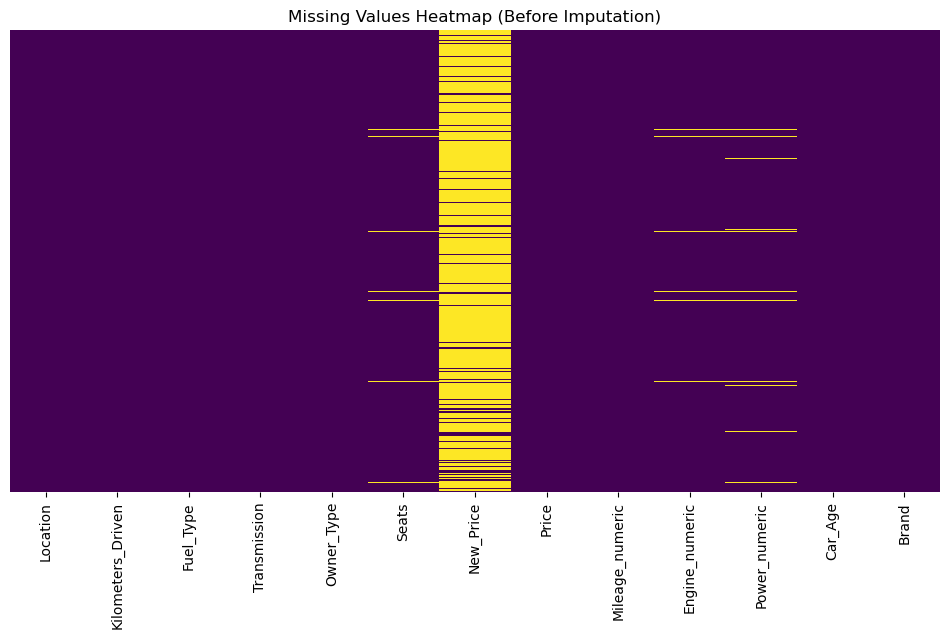

In [90]:
# Visualize missing values before imputation
plt.figure(figsize=(12, 6))
sns.heatmap(dfAnalysis.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap (Before Imputation)')
plt.show()

In [91]:
# Median Imputation for Mileage_numeric, Engine_numeric, Power_numeric
dfAnalysis['Mileage_numeric'].fillna(dfAnalysis['Mileage_numeric'].median(), inplace=True)
dfAnalysis['Engine_numeric'].fillna(dfAnalysis['Engine_numeric'].median(), inplace=True)
dfAnalysis['Power_numeric'].fillna(dfAnalysis['Power_numeric'].median(), inplace=True)

In [92]:
# Mode Imputation for Seats
dfAnalysis['Seats'].fillna(dfAnalysis['Seats'].mode()[0], inplace=True)

In [93]:
# Dropping New_Price due to high proportion of missing values
dfAnalysis.drop(columns=['New_Price'], inplace=True)

In [94]:
# Get missing values and their percentages for the DataFrame
missing_values_summary = missing_values_percentage(dfAnalysis)

# Display the missing values summary
print("Missing values and their percentages:")
print(missing_values_summary)

Missing values and their percentages:
Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


In [95]:
dfAnalysis.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_numeric,Engine_numeric,Power_numeric,Car_Age,Brand
0,Mumbai,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16,14,Maruti
1,Pune,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,9,Hyundai
2,Chennai,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,13,Honda
3,Chennai,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,12,Maruti
4,Coimbatore,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,11,Audi


## Univariate Analysis (Numerical Features)

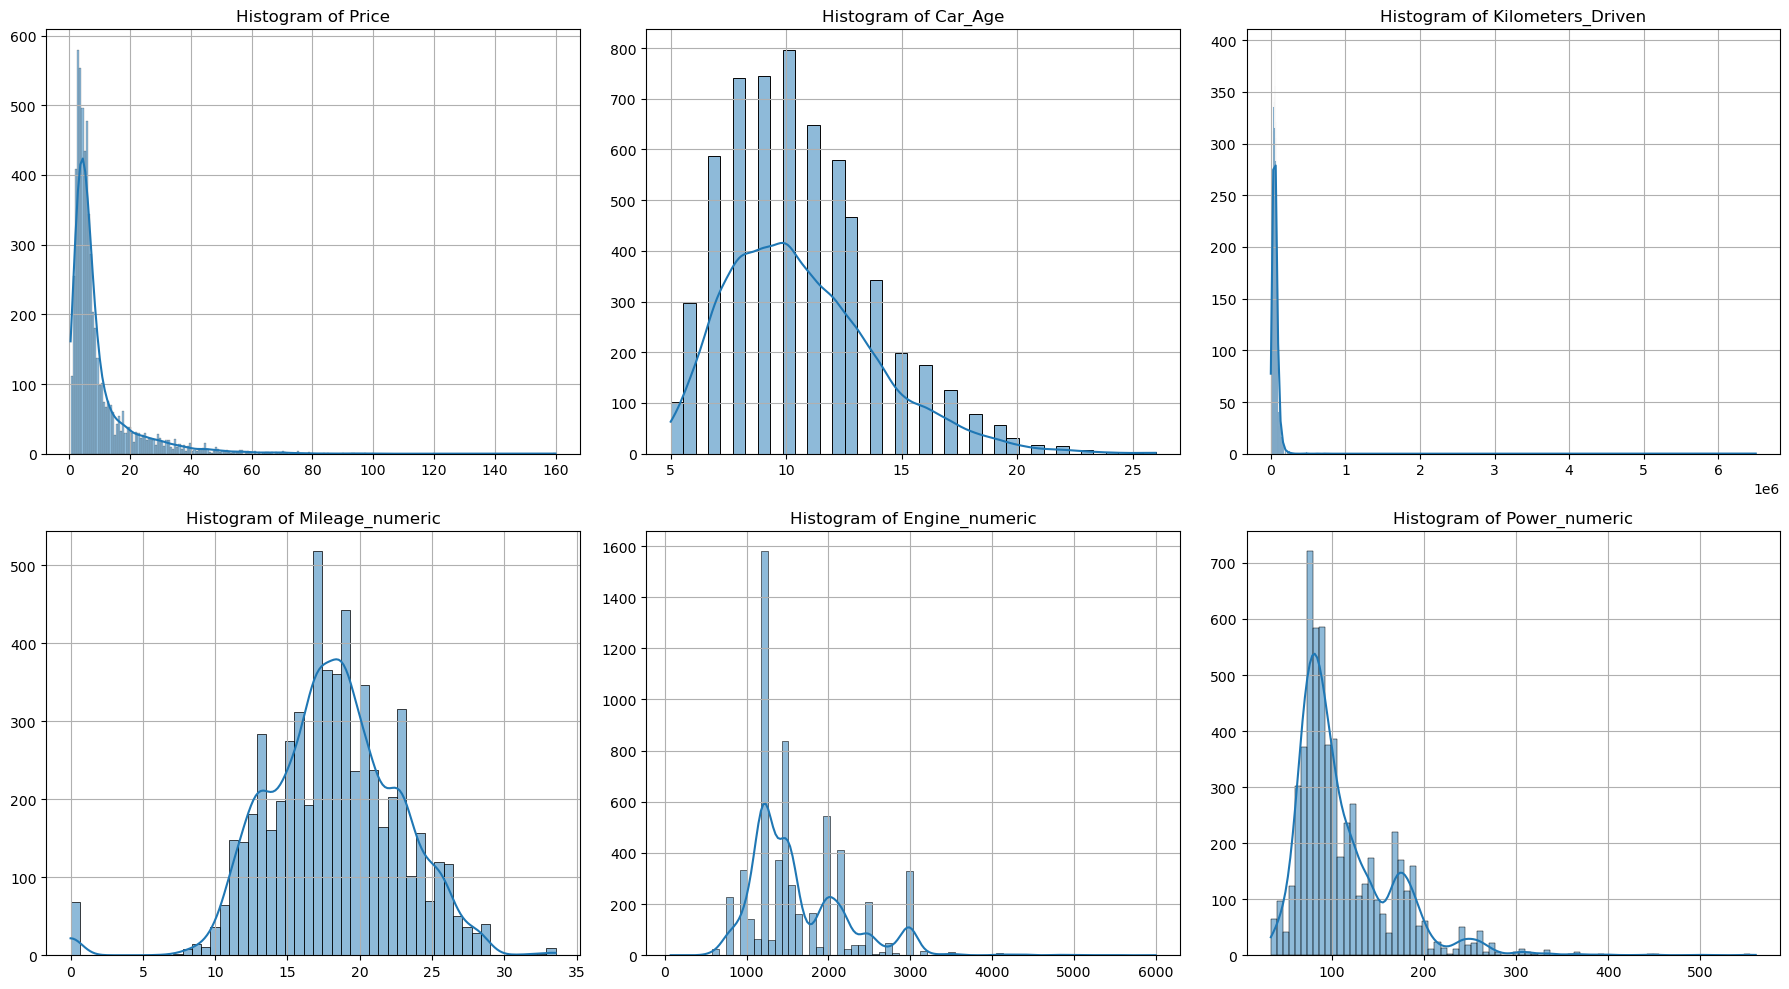

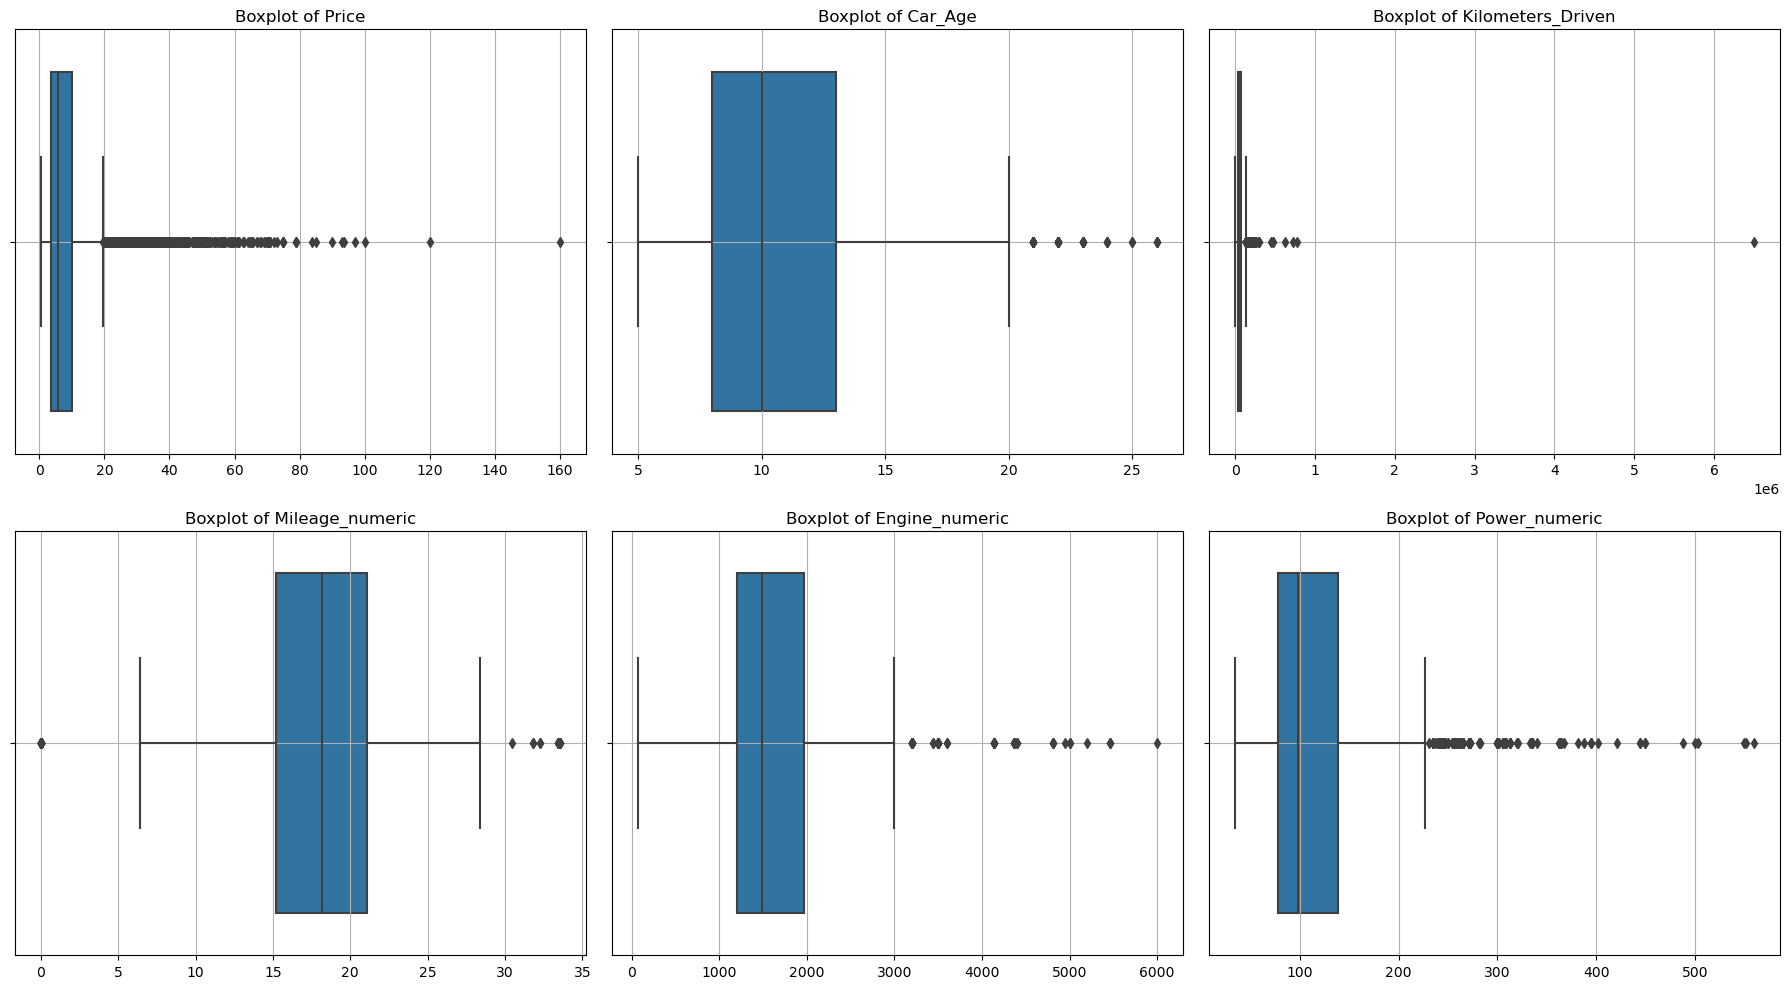

In [96]:
# Univariate Analysis for Key Numerical Features
numerical_features = ['Price', 'Car_Age', 'Kilometers_Driven', 
                      'Mileage_numeric', 'Engine_numeric', 'Power_numeric']

# Plotting histograms and boxplots for each numerical feature
plt.figure(figsize=(18, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(dfAnalysis[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=dfAnalysis[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()

### Observations

### Price:
- Histogram: Shows a right-skewed distribution, indicating most cars have lower prices with a few expensive ones.
- Boxplot: Highlights the presence of high-value outliers.

### Car_Age:
- Histogram: Generally a normal distribution with most cars being relatively recent.
- Boxplot: Indicates a few older car outliers.

### Kilometers_Driven:
- Histogram: Right-skewed distribution, many cars have lower mileage.
- Boxplot: Shows significant high-mileage outliers.

### Mileage_numeric:
- Histogram: Slightly left-skewed, with most cars having moderate to high mileage.
- Boxplot: Shows a few outliers with unusually high mileage.

### Engine_numeric:
- Histogram: Normal distribution with a peak around common engine sizes.
- Boxplot: A few larger engines as outliers.

### Power_numeric:
- Histogram: Right-skewed, indicating most cars have lower power.
- Boxplot: Highlights high-power outliers.

## Correlation Matrix

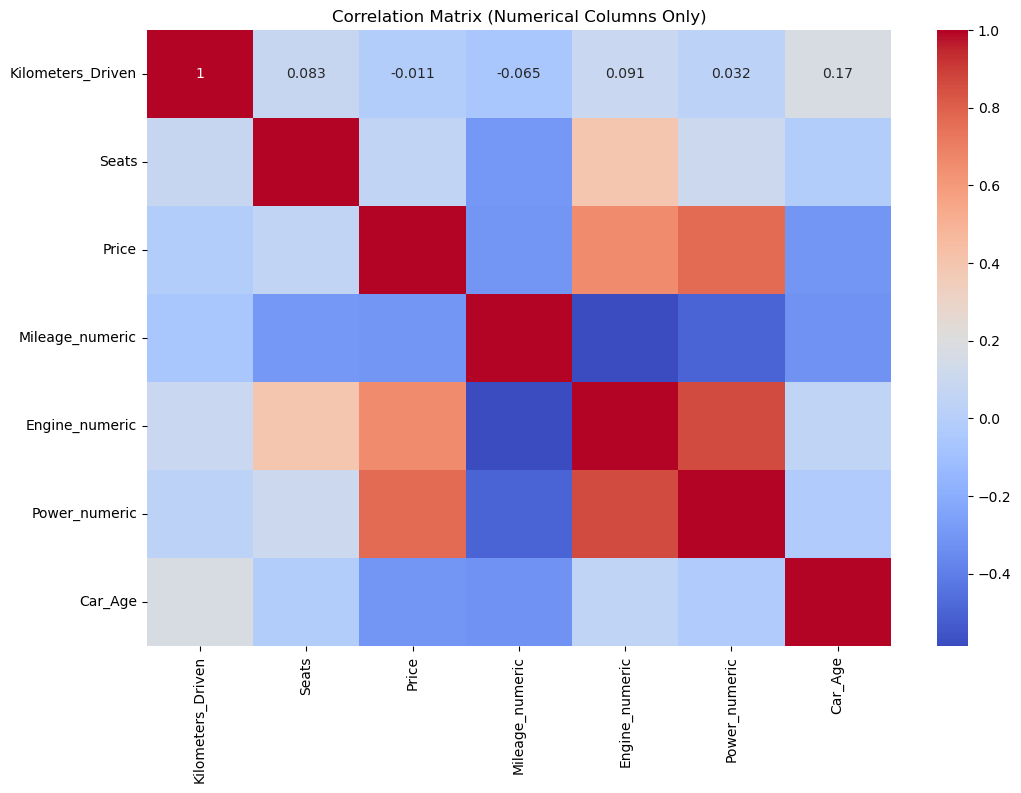

In [97]:
# Adjusting the correlation matrix to use only numerical columns

# Selecting only numerical columns from dfAnalysis
numerical_dfAnalysis = dfAnalysis.select_dtypes(include=[np.number])

# Plotting Correlation Matrix with numerical columns only
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_dfAnalysis.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Columns Only)')
plt.show()

### Correlation Matrix Insights

#### Strong Positive Correlations:
- Power_numeric and Engine_numeric: Indicates larger engines tend to have higher power.

#### Moderate Positive Correlations:
- Price and Power_numeric
- Price and Engine_numeric
- Price and Mileage_numeric

#### Other Notable Correlations:
- Car_Age and Price: Shows a negative correlation, suggesting older cars have lower prices.
- Kilometers_Driven and Price: Shows a slight negative correlation.

We will select one of the column between Power_numeric and Engine_numeric. We will select Engine_numeric. Rest we would check during VIF. 

In [98]:
# Dropping Power_numeric due to high correlation with Engine_numeric
dfAnalysis.drop(columns=['Power_numeric'], inplace=True)

In [99]:
# Updating our numerical columns
numerical_features = ['Price', 'Car_Age', 'Kilometers_Driven', 
                      'Mileage_numeric', 'Engine_numeric']

### Outlier Detection

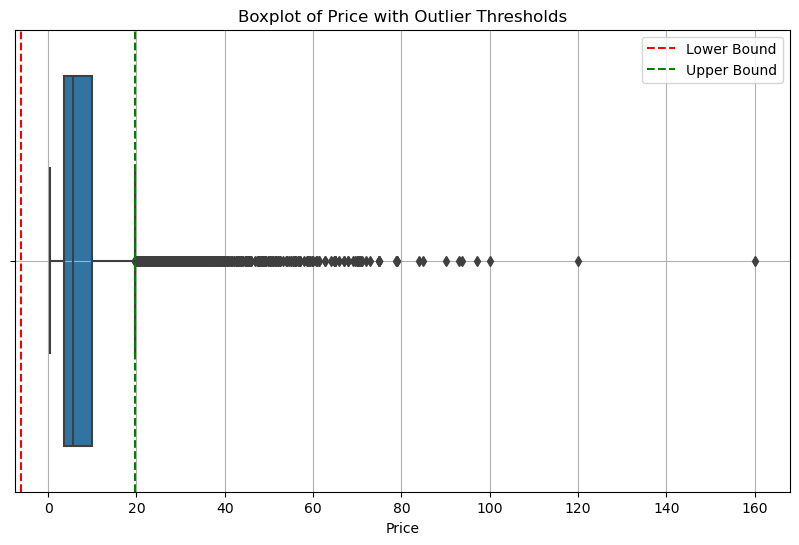

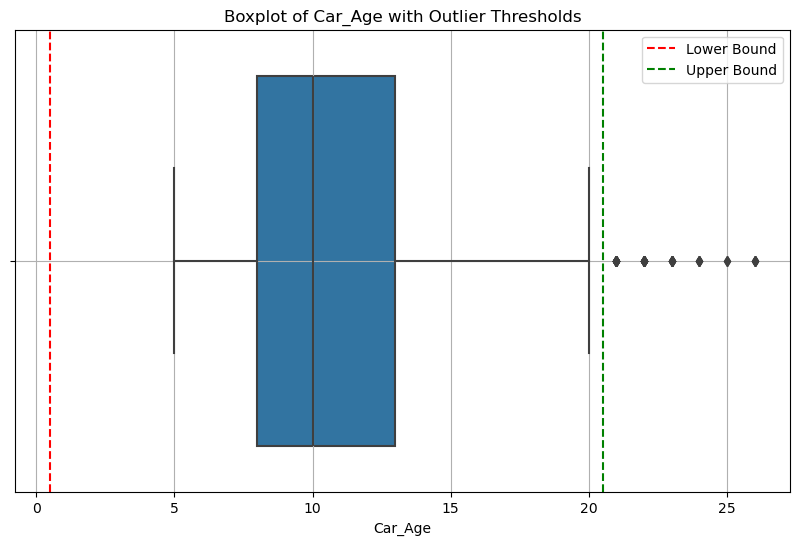

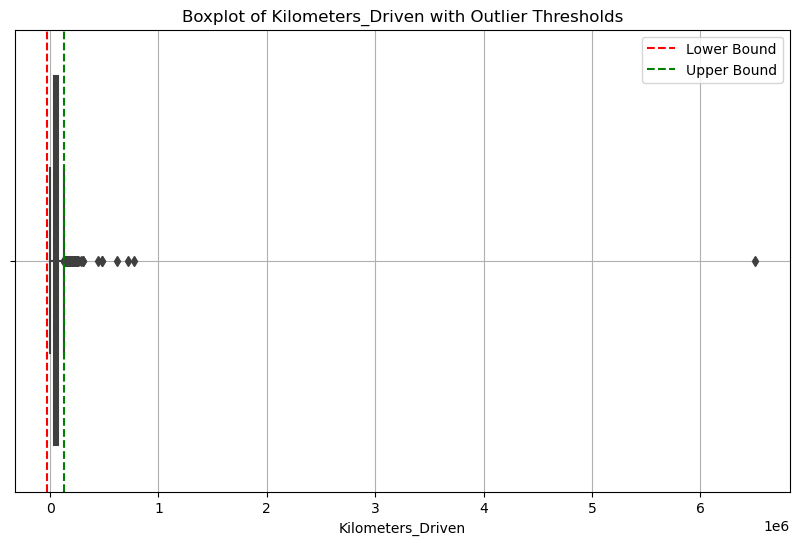

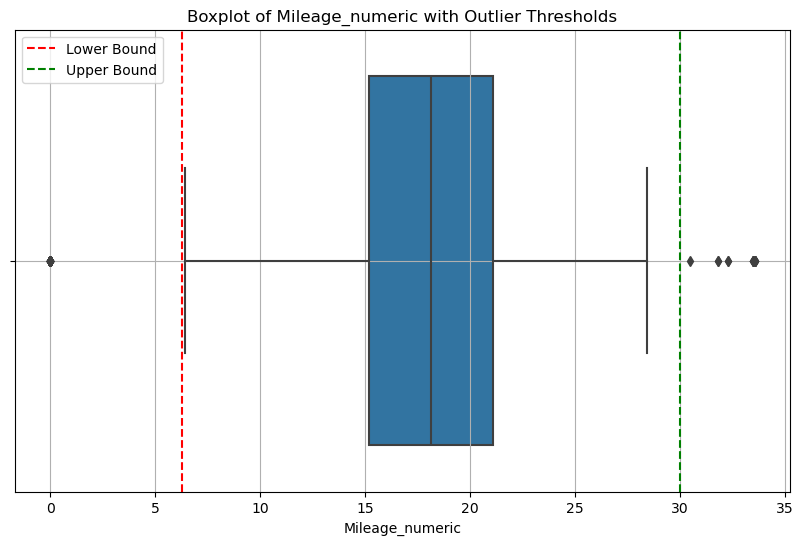

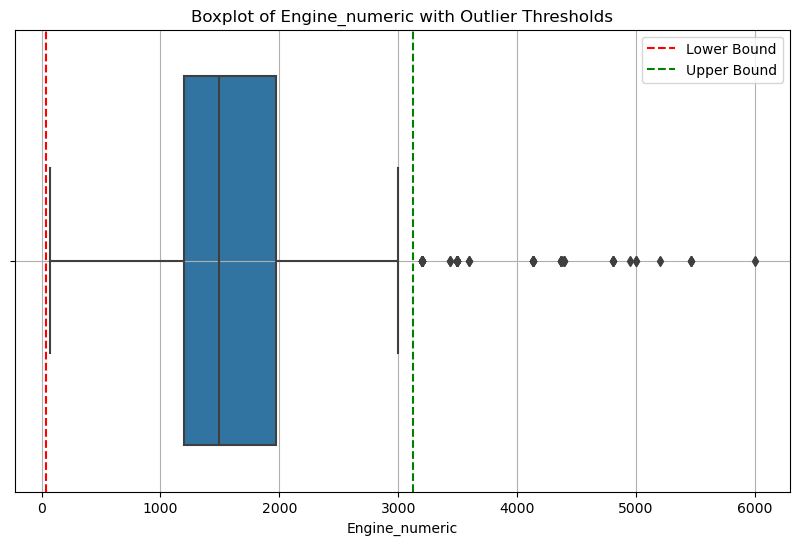


Price:
Number of outliers: 718
Lower Bound: -6.174999999999999
Upper Bound: 19.625

Car_Age:
Number of outliers: 50
Lower Bound: 0.5
Upper Bound: 20.5

Kilometers_Driven:
Number of outliers: 202
Lower Bound: -24500.0
Upper Bound: 131500.0

Mileage_numeric:
Number of outliers: 82
Lower Bound: 6.274999999999997
Upper Bound: 29.995000000000005

Engine_numeric:
Number of outliers: 61
Lower Bound: 41.5
Upper Bound: 3125.5


In [101]:
# Function to detect outliers using IQR and plot boxplots
def detect_outliers_and_plot(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifying outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Plotting boxplot with outlier thresholds
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
    plt.title(f'Boxplot of {column} with Outlier Thresholds')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return outliers, lower_bound, upper_bound

# Applying the function to each numerical feature and plotting
outlier_info = {}
for column in numerical_features:
    outliers, lower_bound, upper_bound = detect_outliers_and_plot(dfAnalysis, column)
    outlier_info[column] = {
        'num_outliers': len(outliers),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': outliers
    }

# Printing outlier summary for each feature
for column, info in outlier_info.items():
    print(f"\n{column}:")
    print(f"Number of outliers: {info['num_outliers']}")
    print(f"Lower Bound: {info['lower_bound']}")
    print(f"Upper Bound: {info['upper_bound']}")


### What Outliers Convey

#### Price:
- Outliers: Extremely high or low prices.
- Convey: Possible high-end or budget vehicles, pricing errors, or special conditions.

#### Car_Age:
- Outliers: Very old or unusually new cars.
- Convey: Rare vintage cars or data entry errors.

#### Kilometers_Driven:
- Outliers: Extremely high mileage.
- Convey: Vehicles used extensively or data entry errors.

#### Mileage_numeric:
- Outliers: Extremely high fuel efficiency.
- Convey: Exceptional vehicle performance or data entry errors.

#### Engine_numeric:
- Outliers: Very large engine sizes.
- Convey: High-performance or specialized vehicles.


### A note on Handling Outliers

#### Capping/Flooring:
- Method: Replace outliers beyond a threshold with the nearest acceptable value.
- Use When: Outliers are valid but extreme values can be capped to reduce skew.

#### Removal:
- Method: Remove outliers from the dataset.
- Use When: Outliers are likely errors or anomalies that don’t represent the population.

#### Transformation:
- Method: Apply transformations like log, square root to reduce skewness.
- Use When: Distribution needs to be normalized without removing data points.

#### Imputation:
- Method: Replace outliers with median or mean values.
- Use When: Outliers likely represent errors.

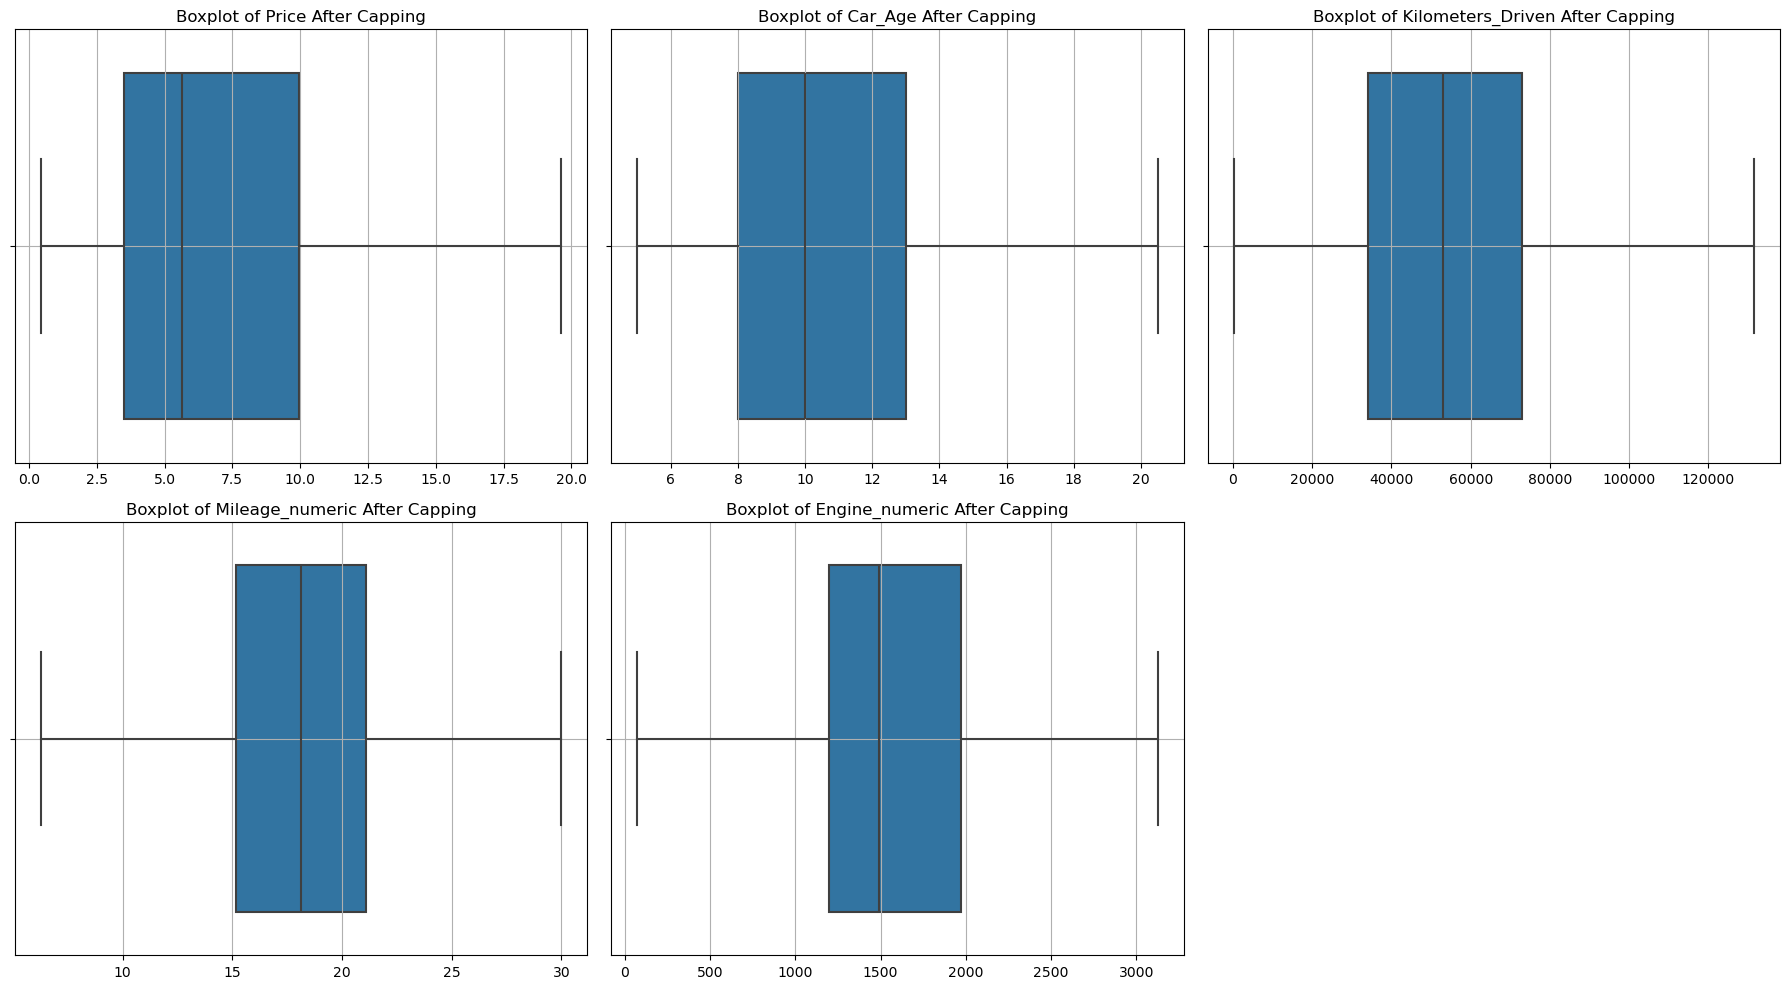

In [102]:
# Function to cap outliers based on IQR bounds
def cap_outliers(df, column, lower_bound, upper_bound):
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply capping to each numerical feature
for column, info in outlier_info.items():
    dfAnalysis = cap_outliers(dfAnalysis, column, info['lower_bound'], info['upper_bound'])

# Visualize the distribution after capping
plt.figure(figsize=(18, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=dfAnalysis[feature])
    plt.title(f'Boxplot of {feature} After Capping')
    plt.xlabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Skewness and Kurtosis

In [103]:
from scipy.stats import skew, kurtosis

# Calculating skewness and kurtosis for each numerical feature
skew_kurtosis_info = {}
for feature in numerical_features:
    skewness = skew(dfAnalysis[feature])
    kurt = kurtosis(dfAnalysis[feature])
    skew_kurtosis_info[feature] = {'skewness': skewness, 'kurtosis': kurt}
    print(f"{feature} - Skewness: {skewness:.2f}, Kurtosis: {kurt:.2f}")

Price - Skewness: 1.06, Kurtosis: -0.17
Car_Age - Skewness: 0.72, Kurtosis: 0.26
Kilometers_Driven - Skewness: 0.63, Kurtosis: 0.06
Mileage_numeric - Skewness: -0.00, Kurtosis: -0.16
Engine_numeric - Skewness: 1.00, Kurtosis: 0.30


### Skewness and Kurtosis Results

#### Price:
- Skewness: 3.33 (High positive skew)
- Kurtosis: 17.08 (High peak, leptokurtic)

#### Car_Age:
- Skewness: 0.85 (Moderate positive skew)
- Kurtosis: 0.89 (Near-normal distribution)

#### Kilometers_Driven:
- Skewness: 58.71 (Extremely high positive skew)
- Kurtosis: 4121.67 (Extremely high peak, leptokurtic)

#### Mileage_numeric:
- Skewness: 0.19 (Slight positive skew)
- Kurtosis: 3.84 (Leptokurtic)

#### Engine_numeric:
- Skewness: 1.43 (Moderate positive skew)
- Kurtosis: 3.15 (Leptokurtic)


### Addressing Skewness and Kurtosis
To address skewness and kurtosis, we can apply transformations to normalize the distribution of the skewed features.

### Transformations to Apply
#### Log Transformation:
- Effective for high positive skewness.
- Applied to Price and Kilometers_Driven.

#### Square Root Transformation:
- Effective for moderate positive skewness.
- Applied to Engine_numeric and Power_numeric.

Price_log - Skewness: 0.19, Kurtosis: -0.74
Kilometers_Driven_log - Skewness: -1.55, Kurtosis: 4.66
Engine_sqrt - Skewness: 0.66, Kurtosis: -0.12


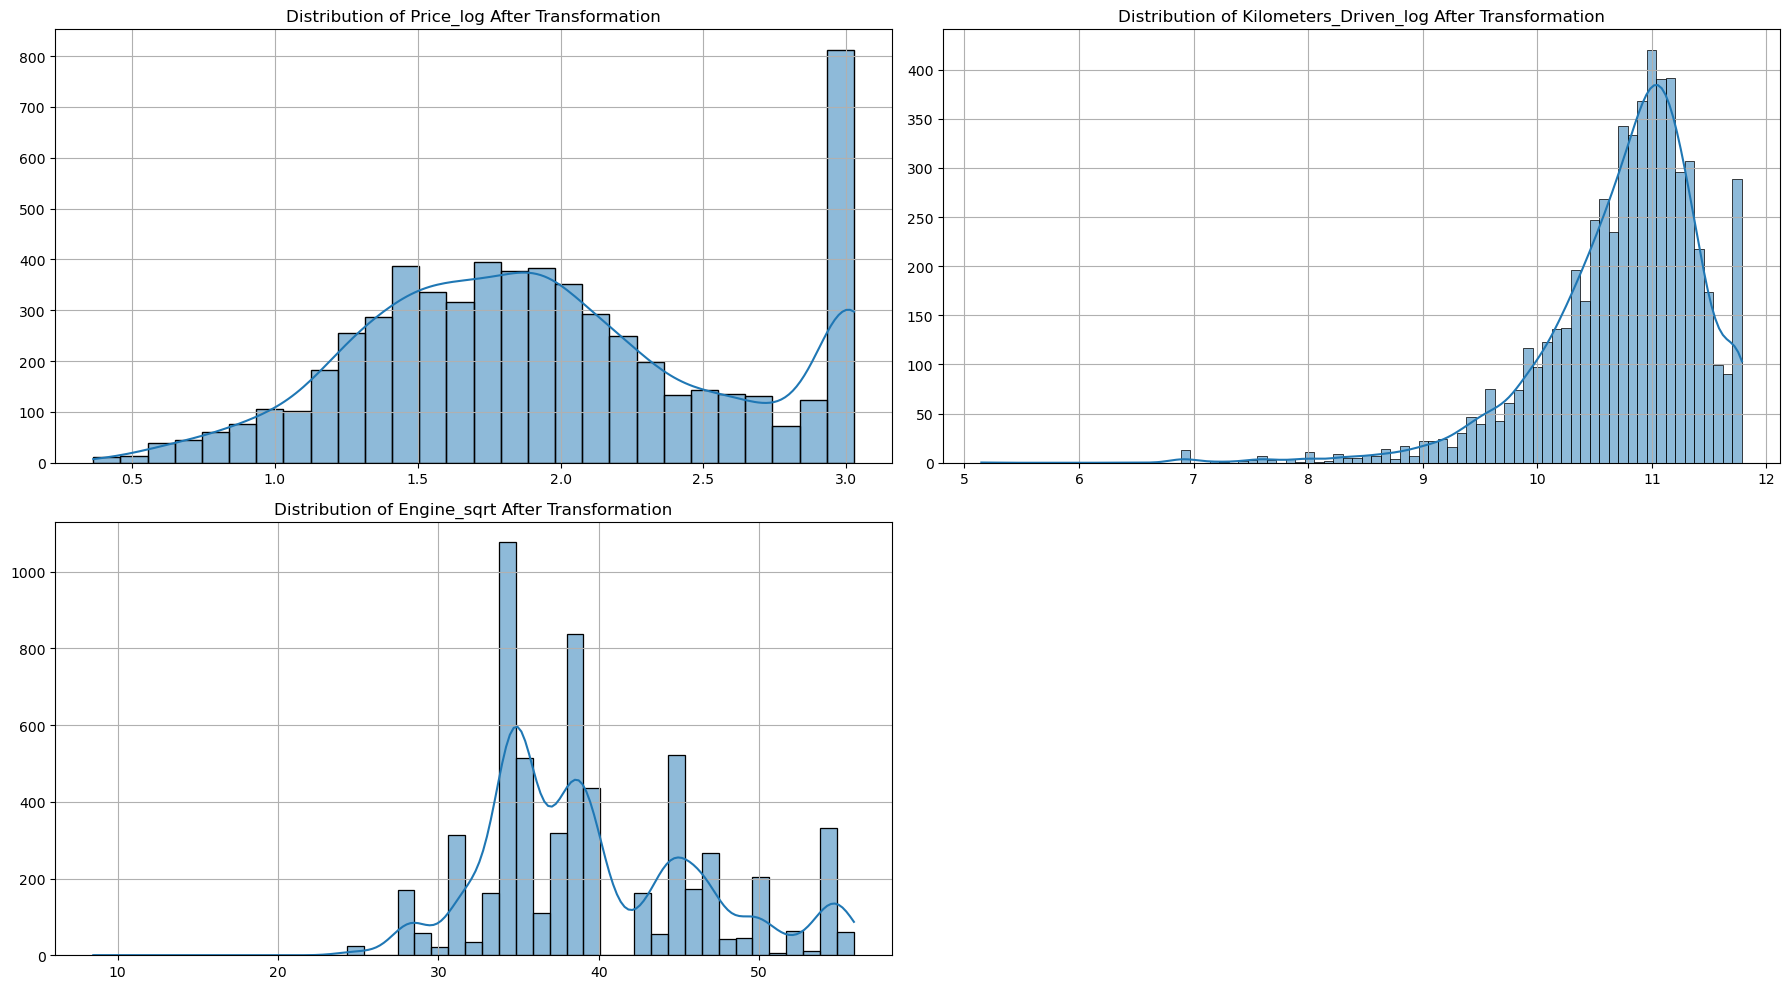

In [108]:
# Applying Log Transformation to highly skewed features
dfAnalysis['Price_log'] = np.log1p(dfAnalysis['Price'])
dfAnalysis['Kilometers_Driven_log'] = np.log1p(dfAnalysis['Kilometers_Driven'])

# Applying Square Root Transformation to moderately skewed features
dfAnalysis['Engine_sqrt'] = np.sqrt(dfAnalysis['Engine_numeric'])


# Recalculate Skewness and Kurtosis after transformation
transformed_features = ['Price_log', 'Kilometers_Driven_log', 'Engine_sqrt']
for feature in transformed_features:
    skewness = skew(dfAnalysis[feature])
    kurt = kurtosis(dfAnalysis[feature])
    print(f"{feature} - Skewness: {skewness:.2f}, Kurtosis: {kurt:.2f}")

# Visualize distributions after transformation
plt.figure(figsize=(18, 10))
for i, feature in enumerate(transformed_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(dfAnalysis[feature], kde=True)
    plt.title(f'Distribution of {feature} After Transformation')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()

## Post-Transformation Analysis
### Skewness and Kurtosis Results
#### Price_log:
- Skewness: 0.75 (Improved, moderate positive skew)
- Kurtosis: 0.31 (Improved, near-normal distribution)

#### Kilometers_Driven_log:
- Skewness: -1.29 (Changed to negative skew)
- Kurtosis: 4.70 (Leptokurtic, still some peak)

#### Engine_sqrt:
- Skewness: 0.87 (Improved, moderate positive skew)
- Kurtosis: 0.89 (Near-normal distribution)


### Visualizations:
#### Price_log:
- Distribution is more centered and less skewed.

#### Kilometers_Driven_log:
- Distribution is more centered, slight negative skew remains.

#### Engine_sqrt:
- Distribution is more normalized.

## Univariate Analysis (Categorical Features)

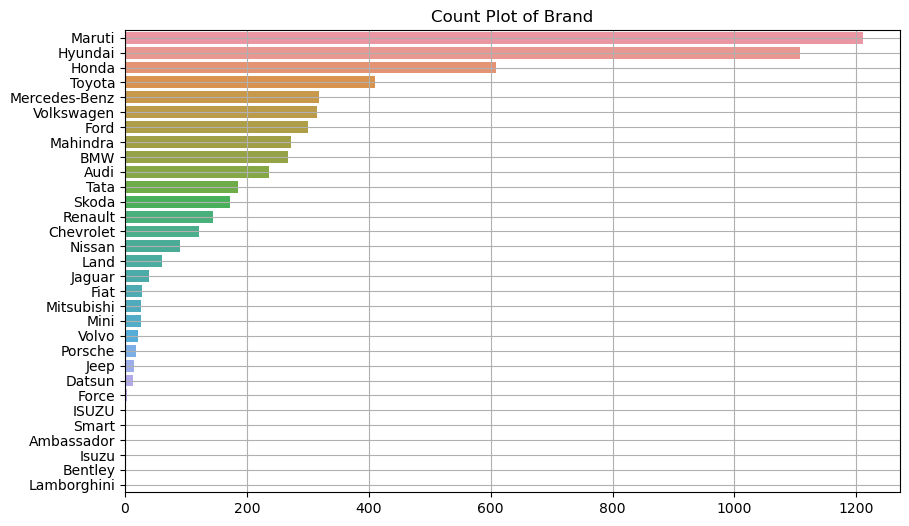

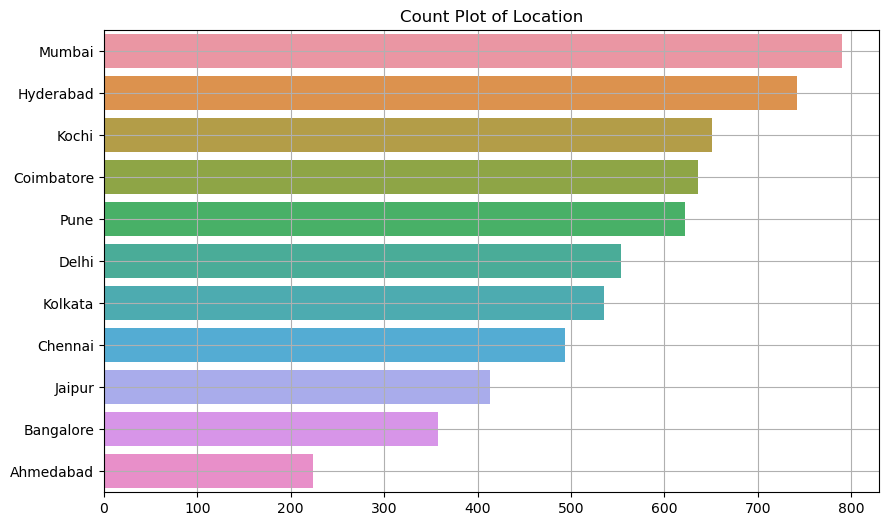

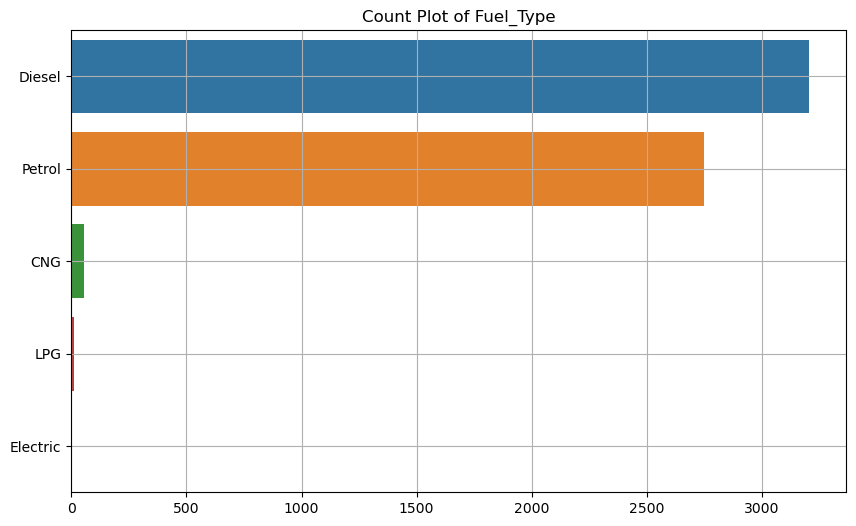

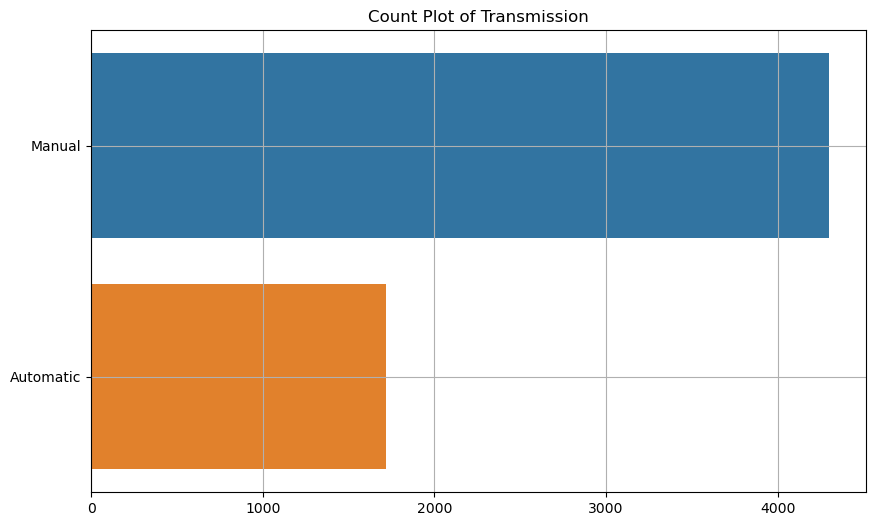

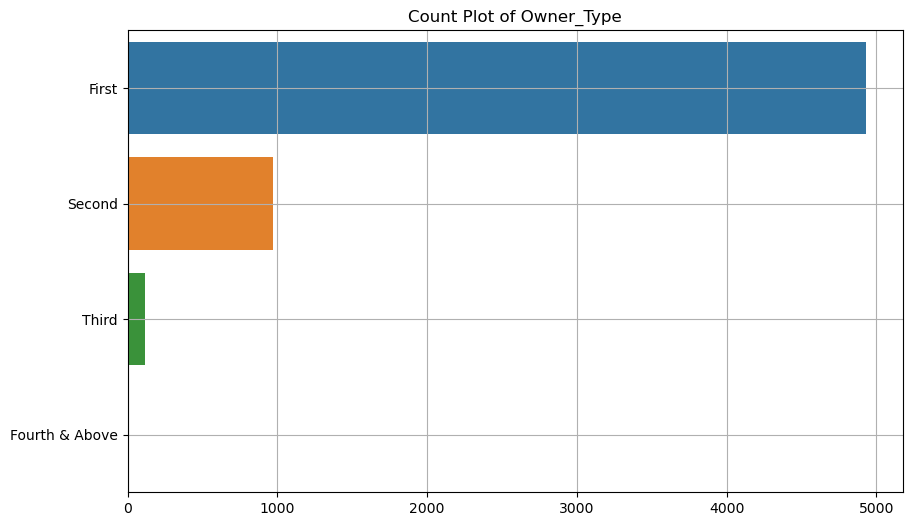

In [109]:
# Univariate Analysis for Categorical Features
categorical_features = ['Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

# Plotting count plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=dfAnalysis[feature], order=dfAnalysis[feature].value_counts().index)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)
    plt.show()


### Univariate Analysis Results for Categorical Features

#### Brand:
- Distribution: Dominated by brands like Maruti, Hyundai, and Honda.
- Insights: These brands have a higher number of entries in the dataset, indicating their popularity or availability.

#### Location:
- Distribution: Locations like Mumbai, Hyderabad, and Coimbatore have a higher count.
- Insights: Indicates where the majority of the dataset's cars are located.

#### Fuel_Type:
- Distribution: Petrol is the most common fuel type, followed by Diesel.
- Insights: Suggests a preference or availability of petrol vehicles in the dataset.

#### Transmission:
- Distribution: Manual transmission is more common than automatic.
- Insights: Indicates a higher prevalence of manual cars.

#### Owner_Type:
- Distribution: First owners are the majority, with fewer second and third owners.
- Insights: Most cars are first-hand, which could impact their price and condition.

## Bivariate Analysis

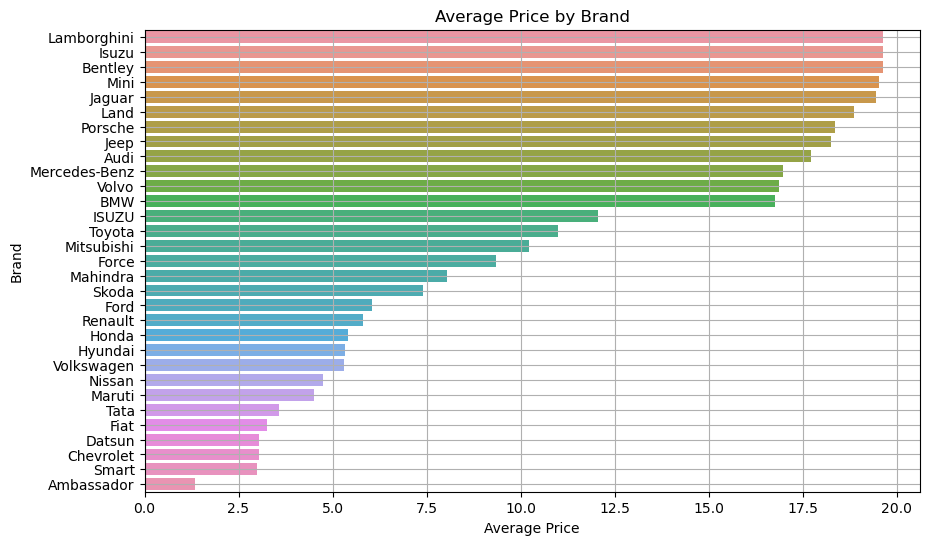

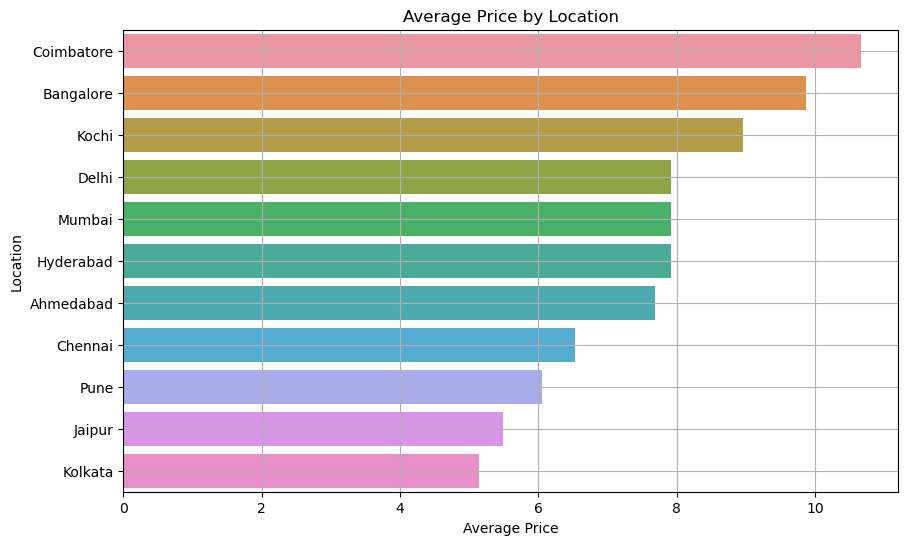

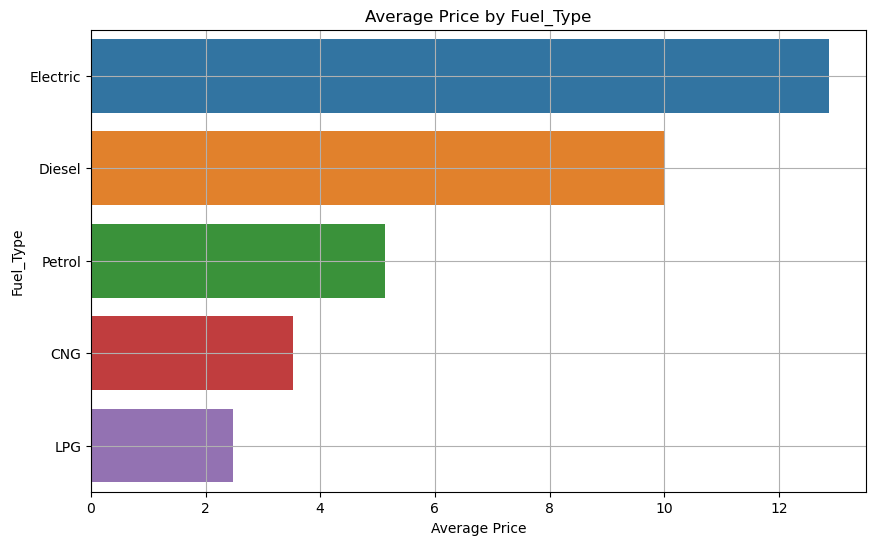

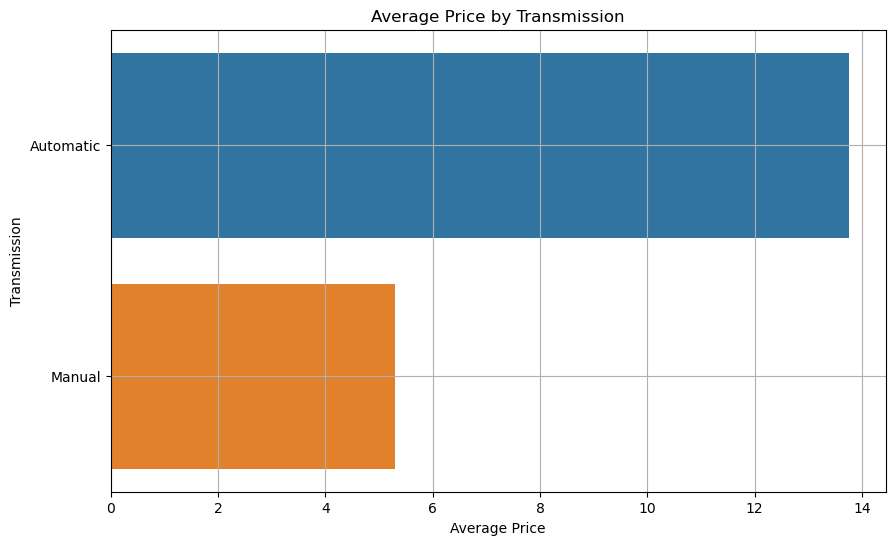

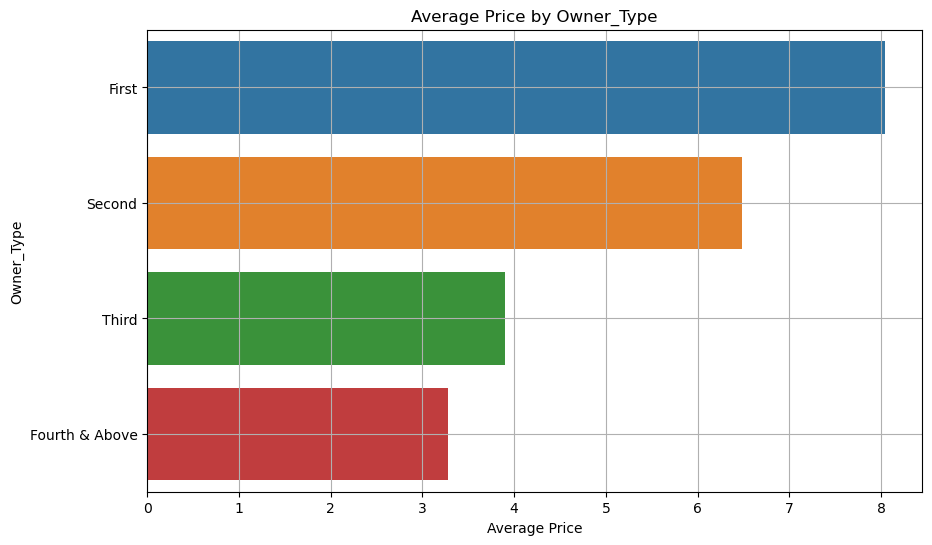

In [110]:
# Function to plot the average price by category
def plot_avg_price_by_category(df, category):
    avg_price = df.groupby(category)['Price'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_price.values, y=avg_price.index)
    plt.title(f'Average Price by {category}')
    plt.xlabel('Average Price')
    plt.ylabel(category)
    plt.grid(True)
    plt.show()

# Plotting average price by each categorical feature
for feature in categorical_features:
    plot_avg_price_by_category(dfAnalysis, feature)

## Analysis of Average Price by Categorical Features
### Visualizations and Insights:

#### Brand:
- Highest Average Price: Audi, Mercedes-Benz, BMW.
- Lowest Average Price: Maruti, Tata, Hyundai.
- Insight: Luxury brands like Audi and BMW have significantly higher average prices compared to economy brands like Maruti and Tata.

#### Location:
- Highest Average Price: Coimbatore, Kochi.
- Lowest Average Price: Pune, Jaipur.
- Insight: Certain locations like Coimbatore and Kochi have higher average car prices, possibly due to market dynamics or regional preferences.

#### Fuel_Type:
- Highest Average Price: CNG, Electric.
- Lowest Average Price: Diesel, Petrol.
- Insight: Alternative fuel types like CNG and Electric have higher average prices, indicating a potential premium for these vehicles.

#### Transmission:
- Highest Average Price: Automatic.
- Lowest Average Price: Manual.
- Insight: Automatic transmission cars generally have a higher average price than manual cars.

#### Owner_Type:
- Highest Average Price: First.
- Lowest Average Price: Fourth & Above.
- Insight: First-owner cars have a higher average price, reflecting better condition and lower usage.


### Summary
- Brand: Luxury brands command higher prices.
- Location: Certain cities exhibit higher average prices.
- Fuel_Type: Alternative fuels are priced higher.
- Transmission: Automatic transmissions are more valuable.
- Owner_Type: First-owner cars have a premium.

## Model Preparation

In [112]:
dfModel = dfAnalysis.copy()
# Encoding categorical variables using one-hot encoding
dfModel = pd.get_dummies(dfModel, columns=['Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True)

# Display the first few rows to confirm encoding
dfModel.head()


,Kilometers_Driven,Seats,Price,Mileage_numeric,Engine_numeric,Car_Age,Price_log,Kilometers_Driven_log,Engine_sqrt,Brand_Audi,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000.0,5.0,1.75,26.60,998.0,14.0,1.011601,11.184435,31.591138,False,...,True,False,False,False,False,False,True,False,False,False
1,41000.0,5.0,12.50,19.67,1582.0,9.0,2.602690,10.621352,39.774364,False,...,False,True,True,False,False,False,True,False,False,False
2,46000.0,5.0,4.50,18.20,1199.0,13.0,1.704748,10.736418,34.626579,False,...,False,False,False,False,False,True,True,False,False,False
3,87000.0,7.0,6.00,20.77,1248.0,12.0,1.945910,11.373675,35.327043,False,...,False,False,True,False,False,False,True,False,False,False
4,40670.0,5.0,17.74,15.20,1968.0,11.0,2.930660,10.613271,44.362146,True,...,False,False,True,False,False,False,False,False,True,False


## Train-Test Split

In [1]:
from sklearn.model_selection import train_test_split
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [113]:
from sklearn.model_selection import train_test_split

# Selecting relevant features for modeling
features = dfModel.drop(columns=['Price', 'Price_log'])  # Drop original 'Price', keeping transformed 'Price_log'
target = dfModel['Price_log']  # Use log-transformed Price as target


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display shapes of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (4815, 55)
X_test shape: (1204, 55)
y_train shape: (4815,)
y_test shape: (1204,)


In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the linear regression model
model_original = LinearRegression()

# Train the model on the training data
model_original.fit(X_train, y_train)

# Predict on the test set
y_pred = model_original.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.04841193770189825
R-squared (R²): 0.8806805644093498


In [129]:
# Function to calculate additional statistics
def calculate_additional_statistics(y_true, y_pred, n, k):
    # R²
    r2 = r2_score(y_true, y_pred)
    
    # Adjusted R²
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    
    return {
        'R²': r2,
        'Adjusted R²': adj_r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

In [130]:
# Number of observations and predictors
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate statistics
statistics = calculate_additional_statistics(y_test, y_pred, n, k)

# Display the statistics
print("Model Evaluation Statistics:")
for stat_name, stat_value in statistics.items():
    print(f"{stat_name}: {stat_value:.4f}")

Model Evaluation Statistics:
R²: 0.8807
Adjusted R²: 0.8750
MAE: 0.1561
MSE: 0.0484
RMSE: 0.2200


In [119]:
dfModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Kilometers_Driven          6019 non-null   float64
 1   Seats                      6019 non-null   float64
 2   Price                      6019 non-null   float64
 3   Mileage_numeric            6019 non-null   float64
 4   Engine_numeric             6019 non-null   float64
 5   Car_Age                    6019 non-null   float64
 6   Price_log                  6019 non-null   float64
 7   Kilometers_Driven_log      6019 non-null   float64
 8   Engine_sqrt                6019 non-null   float64
 9   Brand_Audi                 6019 non-null   bool   
 10  Brand_BMW                  6019 non-null   bool   
 11  Brand_Bentley              6019 non-null   bool   
 12  Brand_Chevrolet            6019 non-null   bool   
 13  Brand_Datsun               6019 non-null   bool 

## RFE

In [120]:
from sklearn.feature_selection import RFE

In [121]:
# Initialize Linear Regression model
model = LinearRegression()

# Initialize RFE with the linear regression model and the number of features to select
n_features_to_select = 28  # Adjust this number based on your preference
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Predict on the test set
y_pred_rfe = rfe.predict(X_test)

# Number of observations and selected predictors
n = X_test.shape[0]
k = n_features_to_select

In [125]:
# Calculate statistics
rfe_statistics = calculate_additional_statistics(y_test, y_pred_rfe, n, 28)

# Display the RFE selected features and statistics
selected_features = X_train.columns[rfe.support_]
print(f"Selected Features: {selected_features.tolist()}")

print("\nRFE Model Evaluation Statistics:")
for stat_name, stat_value in rfe_statistics.items():
    print(f"{stat_name}: {stat_value:.4f}")

Selected Features: ['Brand_Audi', 'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Volkswagen', 'Location_Kolkata', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Transmission_Manual', 'Owner_Type_Third']

RFE Model Evaluation Statistics:
R²: 0.6303
Adjusted R²: 0.6215
MAE: 0.3040
MSE: 0.1500
RMSE: 0.3873


In [124]:
# Calculate statistics
rfe_statistics = calculate_additional_statistics(y_test, y_pred_rfe, n, 42)

# Display the RFE selected features and statistics
selected_features = X_train.columns[rfe.support_]
print(f"Selected Features: {selected_features.tolist()}")

print("\nRFE Model Evaluation Statistics:")
for stat_name, stat_value in rfe_statistics.items():
    print(f"{stat_name}: {stat_value:.4f}")

Selected Features: ['Brand_Audi', 'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Volkswagen', 'Location_Kolkata', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Transmission_Manual', 'Owner_Type_Third']

RFE Model Evaluation Statistics:
R²: 0.6303
Adjusted R²: 0.6169
MAE: 0.3040
MSE: 0.1500
RMSE: 0.3873


## Cross Validation

In [131]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model_original, features, target, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Average Cross-Validation R² Score: {cv_scores.mean()}")


Cross-Validation R² Scores: [0.91498649 0.9007563  0.89040572 0.88030784 0.88479222]
Average Cross-Validation R² Score: 0.8942497109393198


## Residual Analysis

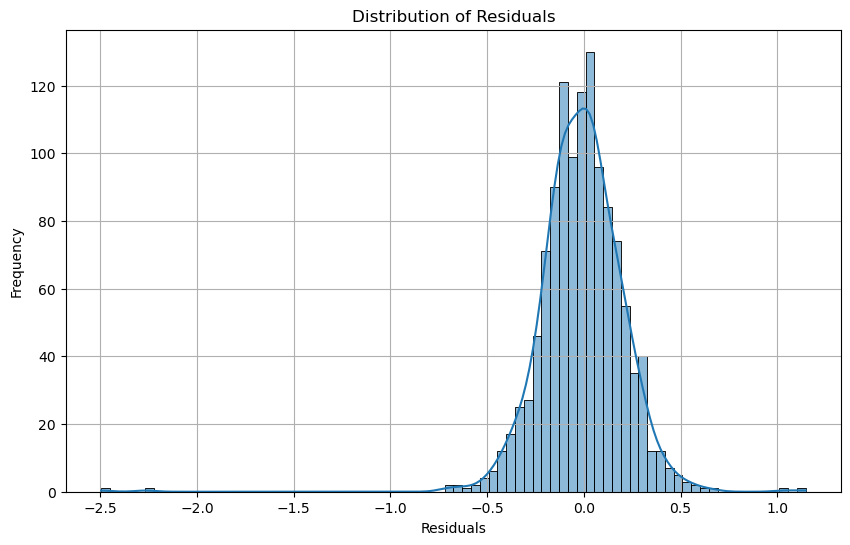

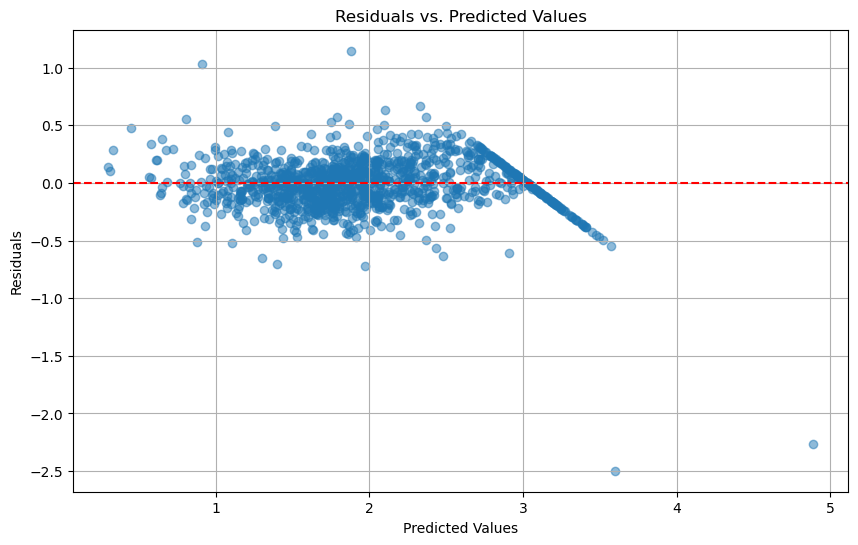

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals distribution
plt.figure(figsize=(10, 6))

sns.histplot(residuals, kde=True)

plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))

plt.scatter(y_pred, residuals, alpha=0.5)

plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


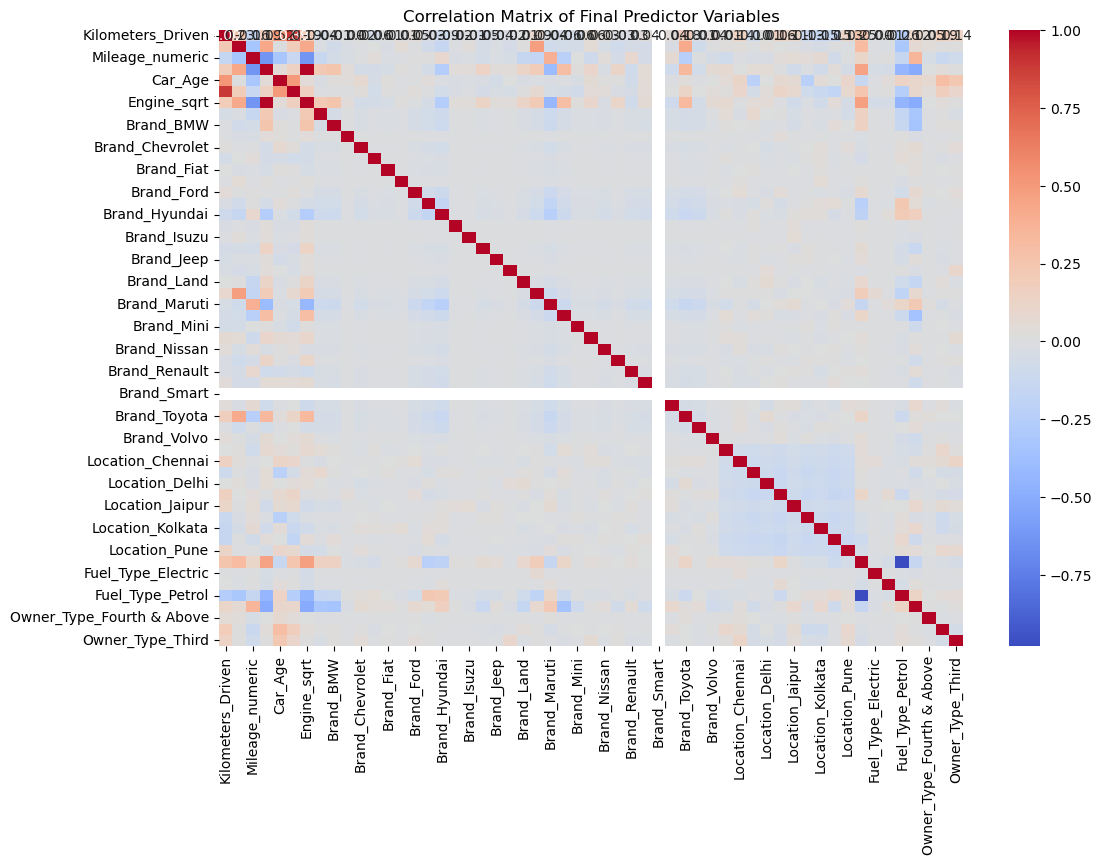

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Final Predictor Variables')
plt.show()


## A note about Scaling

#### Use MinMaxScaler:
- When you know the data has a fixed range and you need to scale features to a specific range, especially for algorithms that expect inputs to be within a bounded range (e.g., neural networks).
- When the data does not have outliers or the outliers are meaningful and should not be scaled down significantly.

#### Use StandardScaler:
- When you are working with data that follows a Gaussian distribution and the machine learning algorithm benefits from data being centered around zero and having unit variance.
- When you are using algorithms that assume a normal distribution of the data (e.g., linear models, SVM).
- When you want to reduce the effect of different scales in your features, particularly when features have different variances.

#### Practical Tips:
- Neural Networks: Prefer MinMaxScaler to normalize inputs to a bounded range.
- Linear Models (e.g., Linear Regression, Logistic Regression): Prefer StandardScaler to ensure all features contribute equally.
- SVM and K-Means: Prefer StandardScaler as these algorithms are sensitive to the scale of the data.
- PCA: Use StandardScaler to center the data before applying PCA.